## Practice with Pandas

Read in the salaries.csv data and answer the following questions:
1.  How many entries are there?
2.  What variables have missing values?  How many missing values?  Are there any columns that have only missing values?
3.  What is the average base pay?
4.  What is the highest amount of overtime pay in the dataset?
5.  What is the job title of JOSEPH DRISCOLL? (Use all caps)
6.  What is the name, job title and total pay of the highest paid person (including benefits)?
7.  What is the name, job title and total pay of the lowest paid person (icluding benefits)?  Do you notice anything strange?
8.  What is the average base pay of all employees per year?
9.  How many unique job titles are there?
10.  What are the top 5 most common jobs?
11. Find the correlation between salary (including benefits) and the length of the Job Title string.  Do you see anything interesting?
12. Make a histograme of Total pay (with benefits)
13. Make a density estimation plot of total pay with benefits.
14. Make side-by-side boxplots of base pay and benefits
15. Make a scatterplot of base pay and benefits

In [21]:
# import necessary modules
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
# import the data
df = pd.read_csv('salaries.csv')

In [18]:
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status,JobTitleLength
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN,46
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN,31
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN,31
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN,36
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN,44


In [ ]:
#1.  How many entries are there?
#2.  What variables have missing values?  How many missing values?  
#Are there any columns that have only missing values?

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 14 columns):
Id                  148654 non-null int64
EmployeeName        148654 non-null object
JobTitle            148654 non-null object
BasePay             148045 non-null float64
OvertimePay         148650 non-null float64
OtherPay            148650 non-null float64
Benefits            112491 non-null float64
TotalPay            148654 non-null float64
TotalPayBenefits    148654 non-null float64
Year                148654 non-null int64
Notes               0 non-null float64
Agency              148654 non-null object
Status              0 non-null float64
JobTitleLength      148654 non-null int64
dtypes: float64(8), int64(3), object(3)
memory usage: 15.9+ MB


In [55]:
#148,654 cases
# BasePay, Benefits, Notes and Status are missing values
# Notes and Status are only missing values
df.isnull().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
JobTitleLength           0
dtype: int64

In [6]:
# 3. Average base pay
df['BasePay'].mean()

66325.44884050643

In [7]:
# 4. Highest amount of overtime
df['OvertimePay'].max()

245131.88

In [8]:
# 5. What is the job title of JOSEPH DRISCOLL? 
df[df['EmployeeName']=='JOSEPH DRISCOLL']['JobTitle']

24    CAPTAIN, FIRE SUPPRESSION
Name: JobTitle, dtype: object

In [9]:
# 6. highest paid person
df[df['TotalPayBenefits']==df['TotalPayBenefits'].max()][['EmployeeName','JobTitle','TotalPayBenefits']]

,EmployeeName,JobTitle,TotalPayBenefits
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,567595.43


In [10]:
#7.  What is the name of the lowest paid person (icluding benefits)?  
#Do you notice anything strange?

df[df['TotalPayBenefits']==df['TotalPayBenefits'].min()][['EmployeeName','JobTitle','TotalPayBenefits']]

# total pay is negative!

,EmployeeName,JobTitle,TotalPayBenefits
148653,Joe Lopez,"Counselor, Log Cabin Ranch",-618.13


In [11]:
#8.  What is the average base pay of all employees per year?
df.groupby('Year').mean()['BasePay']

Year
2011    63595.956517
2012    65436.406857
2013    69630.030216
2014    66564.421924
Name: BasePay, dtype: float64

In [12]:
#9.  How many unique job titles are there?
df['JobTitle'].nunique()

2159

In [14]:
#10.  What are the top 5 most common jobs?
df['JobTitle'].value_counts().head(5)

Transit Operator                7036
Special Nurse                   4389
Registered Nurse                3736
Public Svc Aide-Public Works    2518
Police Officer 3                2421
Name: JobTitle, dtype: int64

In [17]:
#11. Find the correlation between salary (including benefits) 
#and the length of the Job Title string.  
#Do you see anything interesting?

df['JobTitleLength'] = df['JobTitle'].apply(len)
df[['JobTitleLength','TotalPayBenefits']].corr()

#nothing interesting.  There is basically no correlation (as expected)

,JobTitleLength,TotalPayBenefits
JobTitleLength,1.000000,-0.036878
TotalPayBenefits,-0.036878,1.000000


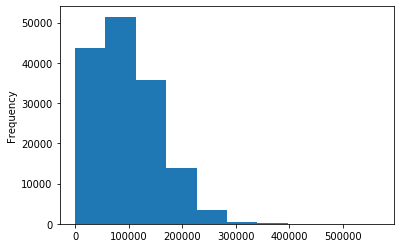

In [22]:
# 12. Make a histograme of Total pay (with benefits)
df['TotalPayBenefits'].plot.hist()

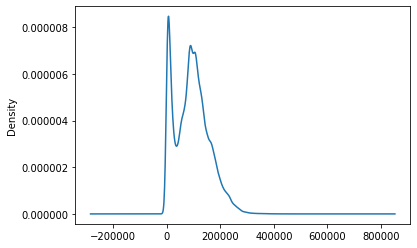

In [49]:
# 13. density estimation plot
df['TotalPayBenefits'].plot.kde()

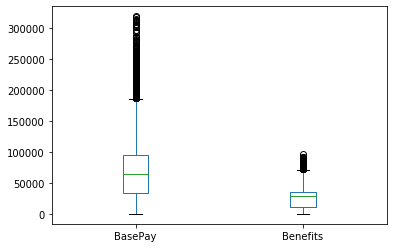

In [48]:
# 14. side-by-side boxplots of base pay and benefits
df[['BasePay','Benefits']].plot.box()

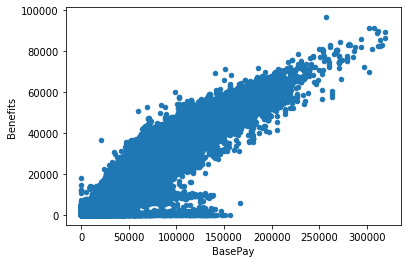

In [32]:
# 15. make a scatterplot of base pay and benefits
df.plot.scatter('BasePay','Benefits')